In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# 1. Load the dataset

In [3]:
df = pd.read_csv('AAPL.csv')  # Make sure it contains a 'Close' column
data = df['close'].values.reshape(-1, 1)

# 2. Normalize the data

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 3. Create sequences (X = past 60 days, y = 61st day)

In [5]:
X, y = [], []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, time_steps, features)


# 4. Build the LSTM model

In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Predict next closing price

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

d:\VI Semester\Stock Market Prediction\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

# 5. Train the model

In [7]:
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0321
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0030
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0032
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0033
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0025
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0023
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0023
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0020
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0019
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0020
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0020
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021
Epoc

# 6. Save the model

In [8]:
model.save('lstm_stock_model.h5')
print("✅ Model trained and saved as lstm_stock_model.h5")

✅ Model trained and saved as lstm_stock_model.h5


## Plot actual vs. predicted (just for visualization)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


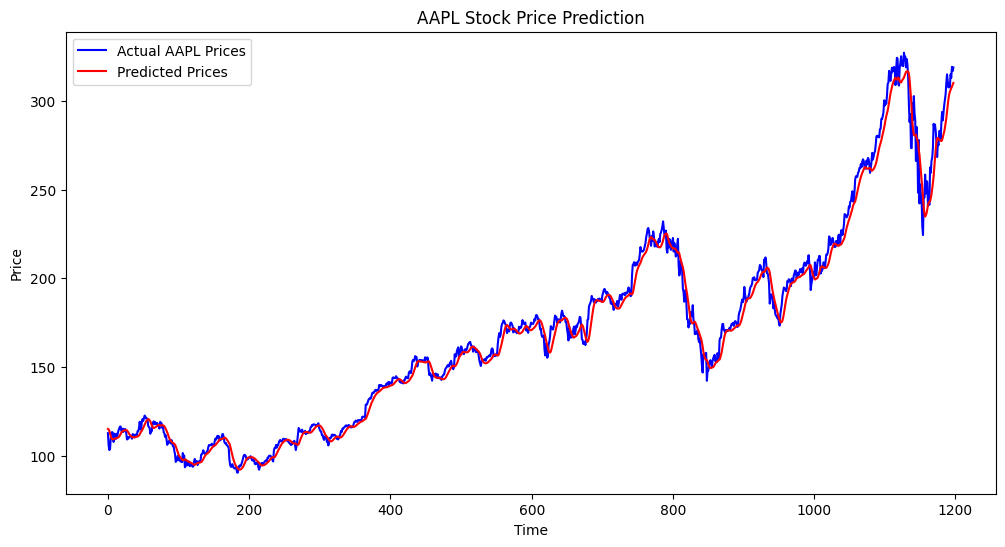

In [9]:
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.plot(actual_prices, color='blue', label='Actual AAPL Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()